# LAB 10 - CLUSTERING

This lab is comprise of 2 main sections:

 - 1. K-Means Clustering
 
 - 2. Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airline = pd.read_csv("airline.csv")
airline.info()
airline.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   BonusMiles       3999 non-null   int64
 2   BonusTrans       3999 non-null   int64
 3   FlightMiles      3999 non-null   int64
 4   FlightTrans      3999 non-null   int64
 5   DaysSinceEnroll  3999 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,48296,31329,9,500,1,3061
1,10021,0,0,0,0,7879
2,49280,22370,16,0,0,3312
3,213539,2750,15,0,0,4751
4,125465,14750,9,0,0,7206


In [3]:
airline.describe()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,263685.000000,86.00000,30817.000000,53.000000,8296.00000


We need to preprocess the data so that we treat each column equally to compute the clusters.

We use the `preprocessing` function from `sklearn` that does all the work for us

### Pre-processing

First, center the data (substract the mean to each column)
=> mean becomes 0 for each column

Then, scale the data, by dividing by the standard deviation
=> std becomes 1 for each column

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
airline_scaled = scaler.fit_transform(airline)

airline_scaled = pd.DataFrame(airline_scaled, columns=airline.columns)
airline_scaled.describe()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.627028e-17,-6.846237e-17,7.329304e-18,1.494456e-16,-1.596622e-16,7.573614e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-7.099918e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00
25%,-5.465676e-01,-6.582276e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01
50%,-3.027332e-01,-4.130308e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02
75%,1.866028e-01,2.756198e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01
max,1.618884e+01,1.020957e+01,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00


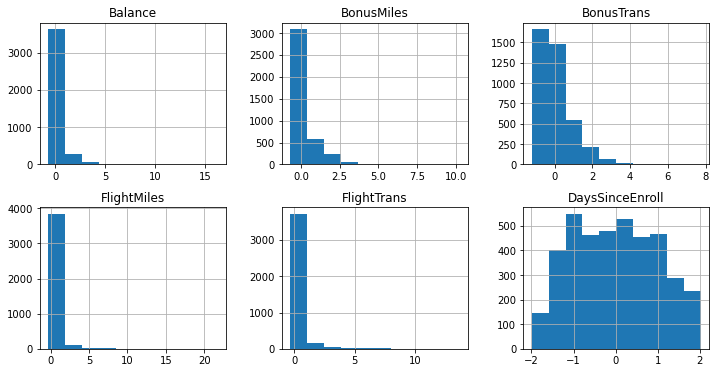

In [5]:
airline_scaled.hist(figsize=(12,6), layout=(2,3))
plt.show()

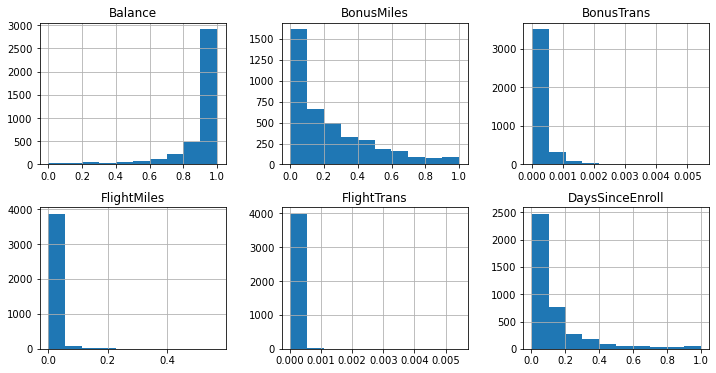

In [6]:
airline_normalized = preprocessing.normalize(airline)
airline_normalized = pd.DataFrame(airline_normalized, columns=airline.columns)

airline_normalized.hist(figsize=(12,6), layout=(2,3))
plt.show()

## K-Means Clustering 

We can select 'k' using the `n_clusters` parameter in `sklearn`s package `KMeans`.

We can set an upper bound to the number of iterations of the algorithm with `max_iter`.

In [7]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=100, random_state=88)
kmeans.fit(airline_scaled)

KMeans(max_iter=100, random_state=88)

Let's explore the results!

How good is the clustering? 

In [8]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

8149.446204102848

In [9]:
# Number of iterations
kmeans.n_iter_

17

In [10]:
# Cluster for each datapoint
kmeans.labels_

array([2, 1, 2, ..., 0, 6, 7])

In [11]:
# Cluster centroids
kmeans.cluster_centers_

array([[ 0.25984667,  0.17769108,  0.46558457, -0.18189471, -0.19877575,
         1.04000491],
       [-0.3489336 , -0.58279777, -0.76371279, -0.21747827, -0.22883067,
         0.69173268],
       [-0.1548387 ,  0.0817275 ,  0.53922647, -0.24067979, -0.2582622 ,
        -0.64230314],
       [ 0.76871189,  0.86170063,  2.49449435,  5.83805875,  6.07319995,
         0.15280077],
       [ 5.22414239,  1.82740802,  1.04216198,  0.78389197,  1.05502903,
         1.07546695],
       [ 0.30986835,  0.14866918,  0.82054862,  1.88116603,  1.9282638 ,
        -0.00928459],
       [-0.41559029, -0.60931827, -0.86447044, -0.23619582, -0.24583721,
        -1.01906746],
       [ 0.68375575,  2.19830368,  1.10719338, -0.08330374, -0.06767486,
         0.47573749]])

If we would like to know the number of observations that belong to each cluster, we can easily calculate that:

In [12]:
kmeans_size = []
clusters = np.unique(kmeans.labels_)
for cluster in clusters:
    kmeans_size.append(len(np.where(kmeans.labels_ == cluster)[0]))

kmeans_size                       

[660, 876, 845, 54, 64, 214, 961, 325]

### Scree Plot (selecting the value of K)

To creat the plot we need to compute the cluster dissimilarity for different values of k

In [13]:
wcss = []
for k in range(1, 100):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(airline_scaled)
    wcss.append(kmeans.inertia_)

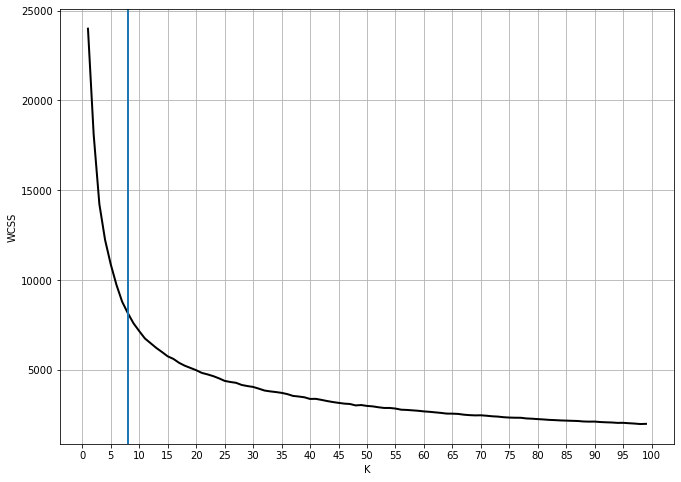

In [14]:
plt.figure(figsize=(11,8))
plt.plot(range(1, 100), wcss, linewidth=2, color='black')
plt.axvline(x=8, linewidth=2)
plt.xticks(np.linspace(0,100,21))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

***Was k = 8 a good choice ?***

Remember that we are looking for a "knee" in the curve / a place where rocks stop falling

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

## Hierarchical Agglomerative Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',
                                        distance_threshold=0)
#n_clusters : number of clusters to find, #affinity: Metric used to compute linkage
agglomerative.fit(airline_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

https://en.wikipedia.org/wiki/Ward%27s_method

We do not choose a number of clusters a priori, instead we let the algorithm build up from clusters comprised from single datapoints up to bigger and bigger clusters, as will be illustrated in the dendrogram. The argument `distance_threshold` is used to calibrate the number of clusters. The threshold refers to the dissimilarity metric, or "distance". 

Setting `distance_threshold` to 0 and calling the method `n_clusters_` yields value equal to the number of datapoints.

In [22]:
agglomerative.n_clusters_

3999

In [23]:
agglomerative.labels_

array([3065, 3904, 2863, ...,    3,    1,    0], dtype=int64)

In [24]:
agglomerative.distances_

array([0.00000000e+00, 1.88561158e-03, 2.26431613e-03, ...,
       6.34860857e+01, 8.25114951e+01, 1.00751847e+02])

In [25]:
agglomerative.children_

array([[2021, 2695],
       [ 272, 3155],
       [ 621, 1478],
       ...,
       [7984, 7991],
       [7989, 7993],
       [7994, 7995]], dtype=int64)

### Plot Dendrogram

In [26]:
a = ['a','b','c']
for count, value in enumerate(agglomerative.children_):
    print(count,value)

0 [2021 2695]
1 [ 272 3155]
2 [ 621 1478]
3 [ 928 3994]
4 [2872 3299]
5 [ 551 2343]
6 [3596 3945]
7 [ 424 2738]
8 [1051 1874]
9 [1524 3162]
10 [3419 3766]
11 [ 65 504]
12 [1446 2762]
13 [1690 2881]
14 [1385 3218]
15 [2482 3718]
16 [1720 2017]
17 [ 141 3515]
18 [1443 3599]
19 [  72 4013]
20 [ 236 2822]
21 [ 222 2250]
22 [ 921 3055]
23 [1757 2146]
24 [1182 2290]
25 [1092 1645]
26 [2563 3455]
27 [ 523 2384]
28 [ 570 3886]
29 [  58 1224]
30 [2016 3345]
31 [  63 1186]
32 [1452 3877]
33 [1711 4025]
34 [ 825 1958]
35 [2469 4010]
36 [ 17 144]
37 [ 328 3693]
38 [ 547 3661]
39 [2894 3894]
40 [2861 3177]
41 [ 385 1654]
42 [1024 1437]
43 [1712 3848]
44 [ 766 4004]
45 [ 730 1274]
46 [ 484 2241]
47 [ 150 3351]
48 [2613 3535]
49 [1498 2539]
50 [ 454 3159]
51 [1054 3023]
52 [2597 3711]
53 [101 656]
54 [ 668 2042]
55 [ 839 2661]
56 [2573 3368]
57 [1289 2432]
58 [ 554 2273]
59 [1040 2100]
60 [3282 4016]
61 [1436 2200]
62 [1008 3687]
63 [1270 3386]
64 [ 729 2536]
65 [ 807 1556]
66 [ 757 2426]
67 [ 223 40

1294 [4470 4718]
1295 [ 379 1435]
1296 [4700 4868]
1297 [ 521 4914]
1298 [1514 1979]
1299 [1056 2912]
1300 [2663 3870]
1301 [3110 3714]
1302 [1105 2074]
1303 [ 279 4742]
1304 [  93 3259]
1305 [ 811 4501]
1306 [2116 5014]
1307 [1373 3688]
1308 [4557 4732]
1309 [ 859 3082]
1310 [3077 4376]
1311 [3854 4814]
1312 [ 774 3030]
1313 [ 337 1974]
1314 [1133 1878]
1315 [ 435 5055]
1316 [1157 2428]
1317 [ 976 1016]
1318 [ 415 1904]
1319 [4720 5009]
1320 [ 680 3149]
1321 [1921 3552]
1322 [2545 4790]
1323 [4215 4803]
1324 [4324 4734]
1325 [ 598 3619]
1326 [ 818 2984]
1327 [4735 5101]
1328 [4584 5181]
1329 [ 600 2488]
1330 [ 405 2905]
1331 [1954 4907]
1332 [ 297 5095]
1333 [ 323 4601]
1334 [320 491]
1335 [3664 3922]
1336 [1331 3816]
1337 [  98 1598]
1338 [2193 4852]
1339 [ 733 4850]
1340 [ 335 4906]
1341 [1473 4625]
1342 [2034 2399]
1343 [1352 3696]
1344 [2675 2938]
1345 [4571 4631]
1346 [4371 4787]
1347 [ 885 3700]
1348 [646 699]
1349 [ 83 812]
1350 [3905 4927]
1351 [4151 4590]
1352 [1097 5070]
135

2395 [ 462 3738]
2396 [5054 5833]
2397 [5625 6136]
2398 [1901 5832]
2399 [5365 5537]
2400 [5372 5873]
2401 [2468 2826]
2402 [2689 2710]
2403 [5268 5422]
2404 [5545 5973]
2405 [3676 5894]
2406 [1628 3447]
2407 [ 192 5691]
2408 [1527 5926]
2409 [ 45 181]
2410 [5710 6132]
2411 [5908 6013]
2412 [1727 2825]
2413 [ 486 4815]
2414 [5819 6061]
2415 [5414 5818]
2416 [1456 6189]
2417 [ 764 2407]
2418 [5199 6018]
2419 [1151 3728]
2420 [  91 5016]
2421 [ 230 2646]
2422 [1464 5042]
2423 [459 834]
2424 [1641 1851]
2425 [5850 6039]
2426 [1465 6307]
2427 [5561 5693]
2428 [2076 3669]
2429 [3649 5895]
2430 [2292 5614]
2431 [4793 6206]
2432 [ 744 3677]
2433 [ 252 6367]
2434 [5728 5805]
2435 [5507 6281]
2436 [3064 5737]
2437 [3300 6026]
2438 [5932 6280]
2439 [1384 1952]
2440 [1396 1689]
2441 [1947 3944]
2442 [3554 6085]
2443 [5371 5598]
2444 [ 957 5048]
2445 [4900 5712]
2446 [5367 5538]
2447 [5765 5778]
2448 [5335 6027]
2449 [ 509 6440]
2450 [1871 2093]
2451 [1726 5991]
2452 [5539 5865]
2453 [ 732 5899]
2

3671 [6792 7523]
3672 [7075 7087]
3673 [7274 7480]
3674 [7562 7597]
3675 [6974 7449]
3676 [7111 7310]
3677 [7545 7567]
3678 [7444 7505]
3679 [7467 7472]
3680 [1599 2492]
3681 [7141 7362]
3682 [7340 7417]
3683 [ 716 2454]
3684 [7255 7503]
3685 [7280 7548]
3686 [2079 7531]
3687 [7287 7583]
3688 [7436 7534]
3689 [7100 7337]
3690 [7327 7565]
3691 [7422 7462]
3692 [7338 7445]
3693 [7187 7313]
3694 [6858 7599]
3695 [7471 7477]
3696 [7130 7341]
3697 [3505 7564]
3698 [7151 7535]
3699 [7356 7390]
3700 [ 392 7627]
3701 [ 507 1425]
3702 [7332 7603]
3703 [7401 7602]
3704 [3126 7551]
3705 [7317 7573]
3706 [7487 7550]
3707 [7483 7646]
3708 [2476 7208]
3709 [3657 3740]
3710 [7334 7380]
3711 [7021 7507]
3712 [7043 7681]
3713 [7229 7595]
3714 [3809 7392]
3715 [6477 7435]
3716 [7031 7524]
3717 [7188 7541]
3718 [7428 7470]
3719 [7411 7637]
3720 [7600 7628]
3721 [7394 7617]
3722 [7124 7260]
3723 [7521 7577]
3724 [7543 7546]
3725 [3387 3474]
3726 [7389 7687]
3727 [2937 3672]
3728 [7276 7454]
3729 [7365 759

In [27]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    """
    Linkage_matrix format
    First two elements in i-th row represents two children clusters that would be merged in i-th
    iteration. Third element Z[i,2] represents dissimilarity distance between two children cluster.
    The last elements represents the number of original observations in the newly formed cluster.
    """
    
    
    dendrogram(linkage_matrix, **kwargs)    

We can choose to truncate our dendrogram use the `truncate_mode='level'`, according to how many levels we wish to plot. For example we can display all 3999 datapoints setting 11 levels, `p=11`, as the 11 levels correspond to `2**11 = 2048` clusters/pairs. If we want to show 6 levels, we set `p = 6`

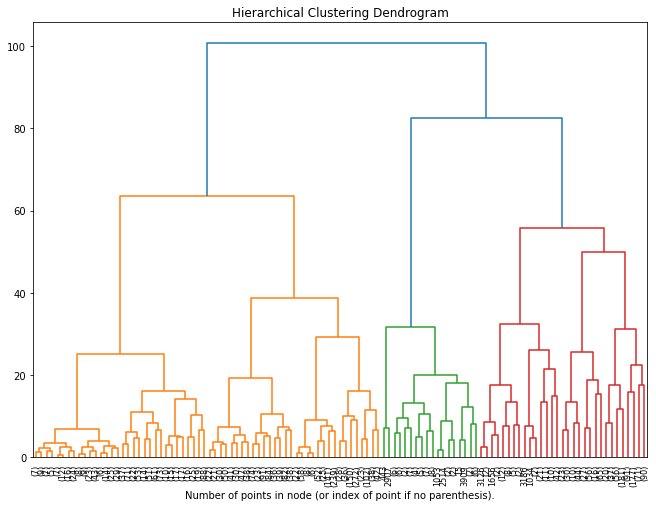

In [29]:
plt.figure(figsize=(11,8))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=6, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Reference for plot code:
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py]

For `AgglomerativeClustering` in `sklearn`, we must set one of either `n_clusters`, or `distance_threshold`. In order to have the attribute `distances_`, which corresponds to our measure of dissimilarity, and allows us to plot our scree plot, we must go with the `distance_threshold` rather than `n_clusters`.

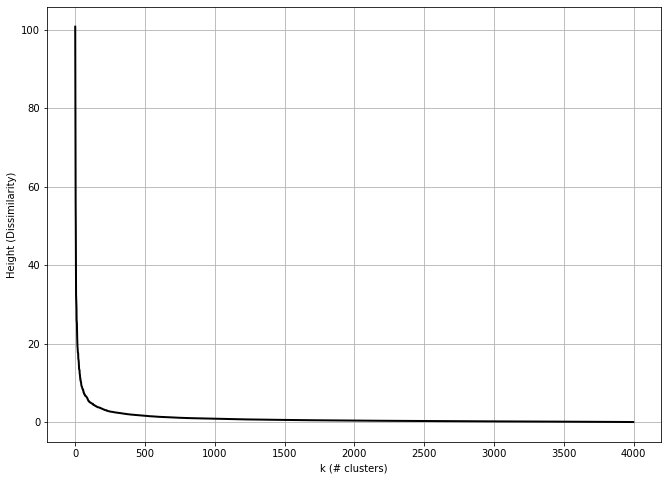

In [30]:
reversed_distances = agglomerative.distances_[::-1]
plt.figure(figsize=(11,8))
plt.plot(reversed_distances, linewidth=2, color='black')
plt.xlabel('k (# clusters)')
plt.ylabel('Height (Dissimilarity)')
plt.grid(axis='both')
plt.show()

Let's zoom on the smallest k values:

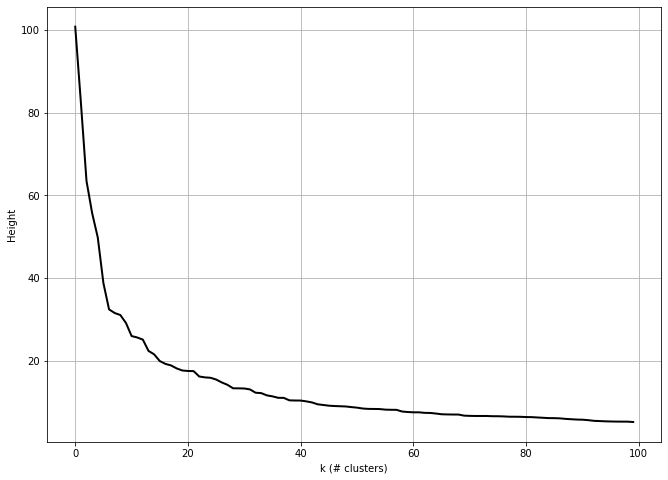

In [31]:
plt.figure(figsize=(11,8))
plt.plot(reversed_distances[:100], linewidth=2, color='black')
plt.xlabel('k (# clusters)')
plt.ylabel('Height')
plt.grid(axis='both')
plt.show()

In [32]:
# What would be a "good" k value ?



After visual inspection of the dendrogram and scree plot, we can now construct the clusters with our selected `k`. We can refit an agglomerative object with the desired parameter. We can make use of `n_clusters`, or also use `distance_threshold`.

In [33]:
new_agglomerative = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward',
                                            distance_threshold=None)
new_agglomerative.fit(airline_scaled)

AgglomerativeClustering(n_clusters=4)

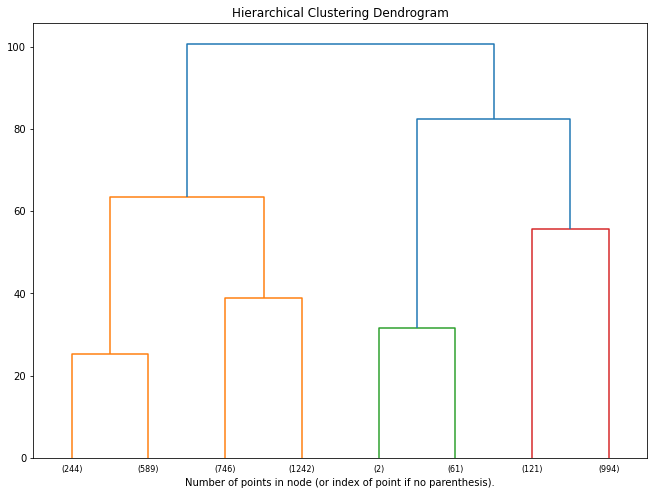

In [34]:
plt.figure(figsize=(11,8))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=2, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Finally, we can access the centroids of each group using pandas

In [35]:
new_airline_scaled = airline_scaled.copy()
new_airline_scaled['Cluster'] = new_agglomerative.labels_
new_airline_scaled.head()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Cluster
0,-0.251137,0.587385,-0.270958,0.028531,-0.098503,-0.512166,1
1,-0.630988,-0.709992,-1.208203,-0.328603,-0.362168,1.821146,3
2,-0.241371,0.216381,0.458011,-0.328603,-0.362168,-0.390609,1
3,1.388779,-0.596111,0.353873,-0.328603,-0.362168,0.306285,0
4,0.514709,-0.099174,-0.270958,-0.328603,-0.362168,1.495218,3


In [36]:
# Cluster Centroids

new_airline_scaled.groupby(['Cluster']).mean()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,
0,0.654459,0.992993,0.875311,0.286323,0.320995,0.213884
1,-0.352499,-0.463723,-0.483425,-0.246188,-0.261371,-0.619749
2,0.666945,0.870265,2.350684,5.495552,5.589117,0.144824
3,-0.085198,-0.288275,-0.195698,-0.211341,-0.228595,1.181821


In [37]:
# Cluster Size

new_airline_scaled.groupby(['Cluster']).count()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,
0,1115,1115,1115,1115,1115,1115
1,1988,1988,1988,1988,1988,1988
2,63,63,63,63,63,63
3,833,833,833,833,833,833


Finally, let's plot them with color maps.

C:\Users\Hyungki Im\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hyungki Im\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


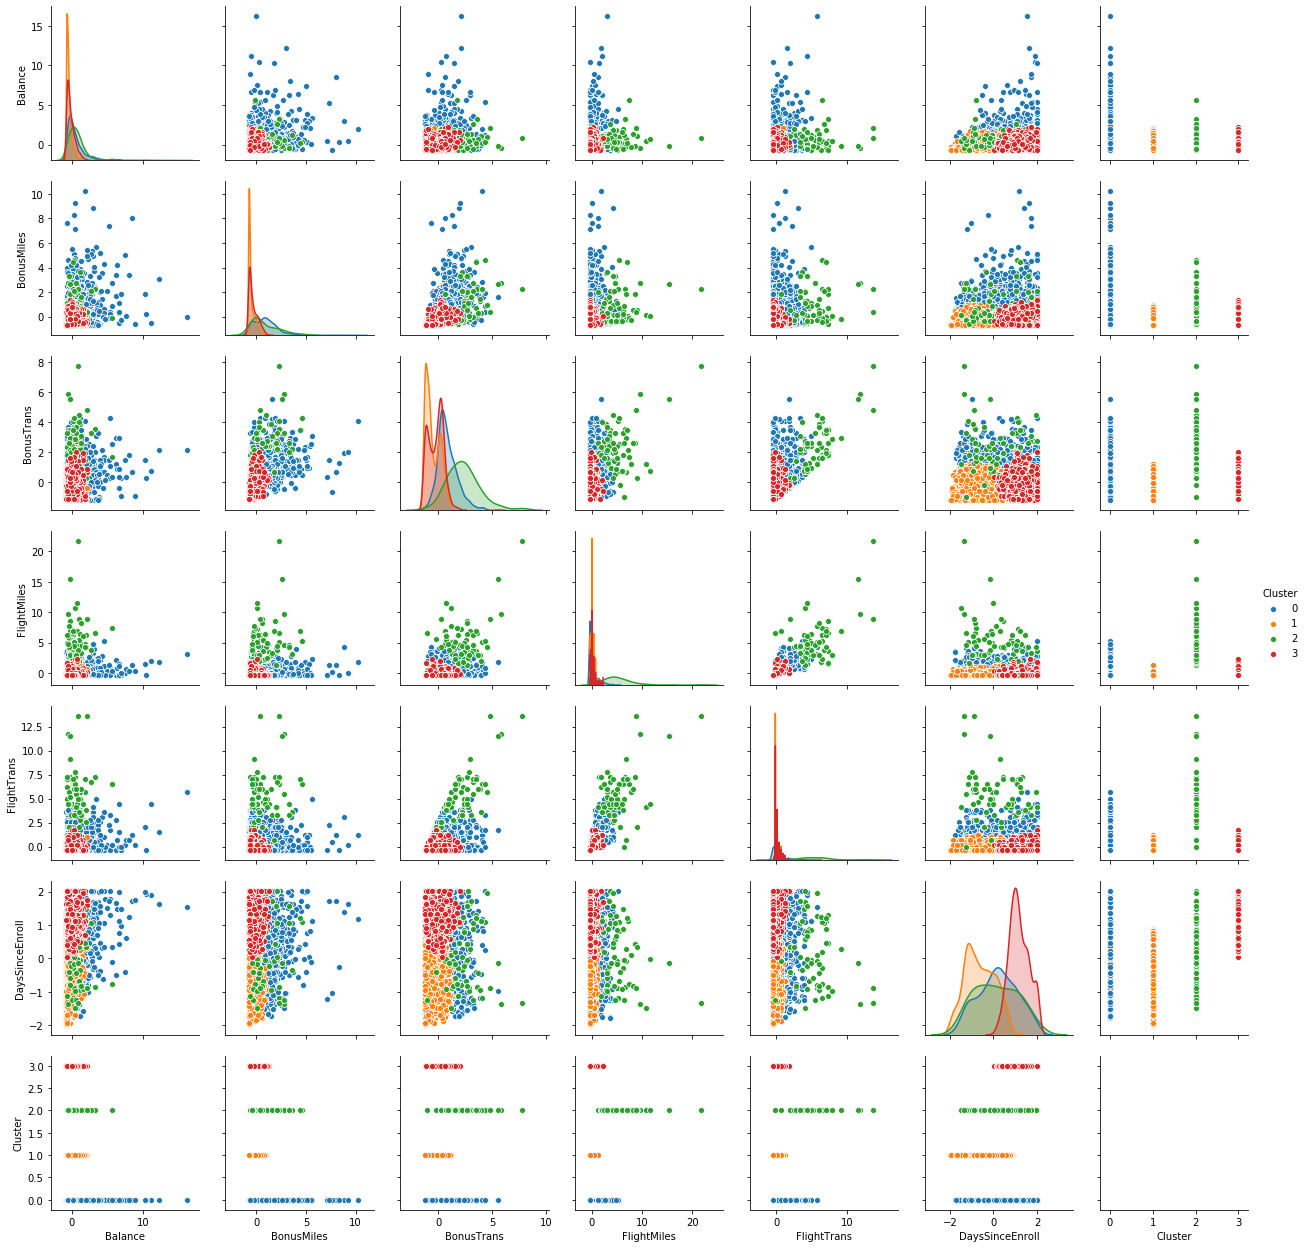

In [31]:
import seaborn as sns

sns.pairplot(new_airline_scaled, hue='Cluster')
plt.show()

# ------------------------------------------------------------------------------------------

## EXTRA

In [32]:
# from scipy.cluster.hierarchy import fcluster, linkage

# # generate the linkage matrix
# Z = linkage(airline_scaled, 'ward')
# max_d = 0
# clusters = fcluster(Z, max_d, criterion='distance')
# clusters

In [33]:
# height = []
# for d in range(0, 100):
#     agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',
#                                             distance_threshold=d, compute_distances=True)
#     agglomerative.fit(airline_scaled)
#     height.append(agglomerative.distances_)